# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Burden_of_Mental_Illness
### 1.2 Fragestellung:
- Welche psychische Krankheit ist zahlenmässig zwischen 1990 und 2021 am meisten gestiegen?
Welche Krankheit ist am weitesten verbreitet?
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare




### 1.4 Daten beschaffen und laden

In [ ]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_csv("mental_disorders_global_1990_2021.csv", sep=";")
df.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,2,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,22,All ages,558,Mental disorders,1,Number,1990,8.363150e+07,1.052900e+08,6.026368e+07
1,2,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,22,All ages,558,Mental disorders,2,Percent,1990,3.042552e-02,3.701543e-02,2.294135e-02
2,2,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,22,All ages,558,Mental disorders,3,Rate,1990,1.567278e+03,1.973165e+03,1.129359e+03
3,2,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,22,All ages,559,Schizophrenia,1,Number,1990,9.533395e+06,1.202186e+07,6.941600e+06
4,2,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,22,All ages,559,Schizophrenia,2,Percent,1990,3.476355e-03,4.342438e-03,2.516988e-03


: 

## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [ ]:
df_dalys = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["location_name"] == "Global") &
    (df["sex_name"] == "Both") &
    (df["age_name"] == "All ages") &
    (df["metric_name"] == "Number")
]

df_pivot = df_dalys.pivot(index="cause_name", columns="year", values="val")
df_pivot.head()


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
cause_name,,,,,,,,,,,,,,,,,,,,,
Anxiety disorders,2.161264e+07,2.196384e+07,2.232432e+07,2.269850e+07,2.308172e+07,2.347458e+07,2.387709e+07,2.428752e+07,2.470914e+07,2.513469e+07,...,3.031671e+07,3.094012e+07,3.169491e+07,3.257474e+07,3.344007e+07,3.434719e+07,3.524388e+07,3.619555e+07,4.430480e+07,4.559915e+07
Attention-deficit/hyperactivity disorder,2.845618e+06,2.914066e+06,2.976740e+06,3.032728e+06,3.079116e+06,3.114712e+06,3.143605e+06,3.167991e+06,3.189721e+06,3.207618e+06,...,3.440771e+06,3.475789e+06,3.508311e+06,3.534027e+06,3.553405e+06,3.574883e+06,3.598955e+06,3.624443e+06,3.647554e+06,3.676544e+06
Autism spectrum disorders,5.677258e+06,5.769007e+06,5.859538e+06,5.951636e+06,6.041845e+06,6.130455e+06,6.221813e+06,6.319107e+06,6.416365e+06,6.519708e+06,...,8.176615e+06,8.333165e+06,8.490588e+06,8.646946e+06,8.803837e+06,8.965487e+06,9.128820e+06,9.286879e+06,9.417911e+06,9.553207e+06
Bipolar disorder,4.552571e+06,4.634308e+06,4.716257e+06,4.801431e+06,4.885020e+06,4.970033e+06,5.055646e+06,5.142794e+06,5.231615e+06,5.322330e+06,...,6.609121e+06,6.705235e+06,6.800064e+06,6.895951e+06,6.991508e+06,7.088312e+06,7.182673e+06,7.281986e+06,7.352909e+06,7.426966e+06
Conduct disorder,3.754322e+06,3.786870e+06,3.819806e+06,3.859165e+06,3.902494e+06,3.950983e+06,4.002629e+06,4.054914e+06,4.103140e+06,4.145432e+06,...,4.311621e+06,4.351125e+06,4.392674e+06,4.433210e+06,4.473072e+06,4.519898e+06,4.574092e+06,4.626676e+06,4.672887e+06,4.718556e+06


: 

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [ ]:
df.dtypes

measure_id         int64
measure_name      object
location_id        int64
location_name     object
sex_id             int64
sex_name          object
age_id             int64
age_name          object
cause_id           int64
cause_name        object
metric_id          int64
metric_name       object
year               int64
val              float64
upper            float64
lower            float64
dtype: object

: 

In [ ]:
df["cause_name"].nunique(), df["location_name"].nunique(), df["year"].nunique(), df["sex_name"].nunique(), df["age_name"].nunique()



(11, 1, 32, 1, 1)

: 

In [ ]:
df["cause_name"].value_counts()


cause_name
Mental disorders                                    96
Schizophrenia                                       96
Anxiety disorders                                   96
Eating disorders                                    96
Autism spectrum disorders                           96
Attention-deficit/hyperactivity disorder            96
Conduct disorder                                    96
Idiopathic developmental intellectual disability    96
Other mental disorders                              96
Depressive disorders                                96
Bipolar disorder                                    96
Name: count, dtype: int64

: 

In [ ]:
len(df)

1056

: 

In [ ]:
df.isna().sum()



measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
metric_id        0
metric_name      0
year             0
val              0
upper            0
lower            0
dtype: int64

: 

In [ ]:
df[["year", "cause_name", "location_name", "val"]].isna().sum()


year             0
cause_name       0
location_name    0
val              0
dtype: int64

: 

Der Datensatz umfasst insgesamt 1056 Datenpunkte. Es wurden keine fehlenden Werte festgestellt, weder im gesamten Datensatz noch in den für die Analyse relevanten Spalten (year, cause_name, location_name, val). Die Daten sind vollständig und können ohne Bereinigung weiterverwendet werden.

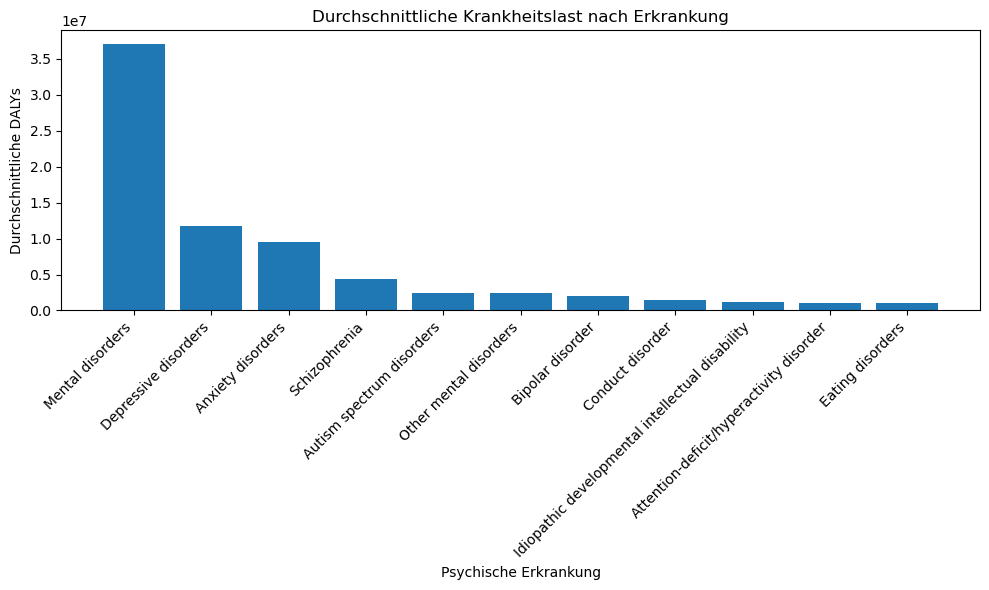

: 

In [ ]:
import matplotlib.pyplot as plt

mean_by_disease = df.groupby("cause_name")["val"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(mean_by_disease.index, mean_by_disease.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Psychische Erkrankung")
plt.ylabel("Durchschnittliche DALYs")
plt.title("Durchschnittliche Krankheitslast nach Erkrankung")
plt.tight_layout()
plt.show()


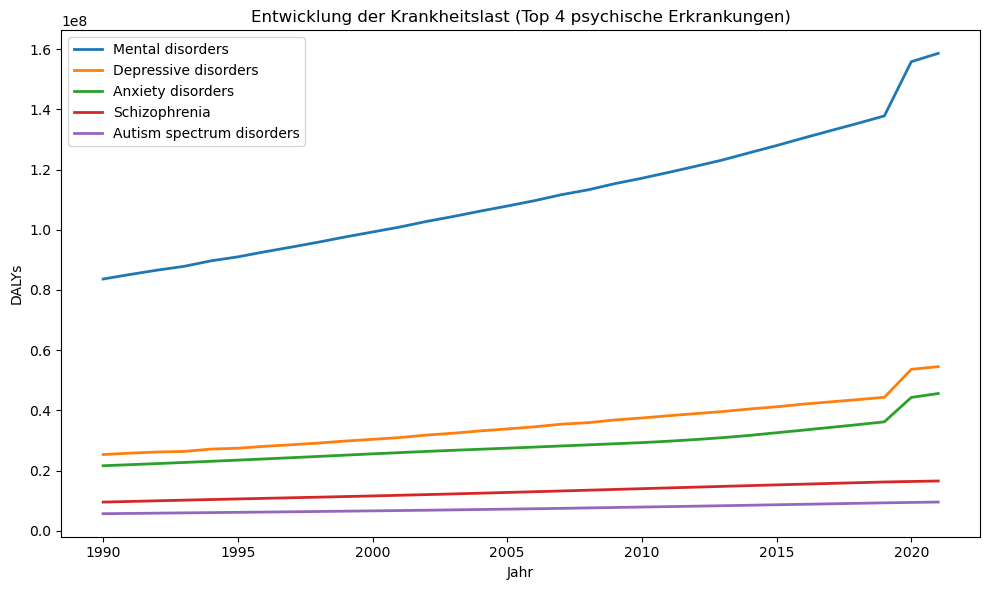

: 

In [ ]:
import matplotlib.pyplot as plt

df_global = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["location_name"] == "Global") &
    (df["sex_name"] == "Both") &
    (df["age_name"] == "All ages") &
    (df["metric_name"] == "Number")
]

top5 = df_global.groupby("cause_name")["val"].mean().nlargest(5).index
df_top = df_global[df_global["cause_name"].isin(top5)]

plt.figure(figsize=(10,6))

for krankheit in top5:
    daten = df_top[df_top["cause_name"] == krankheit].sort_values("year")
    plt.plot(daten["year"], daten["val"], label=krankheit, linewidth=2)

plt.xlabel("Jahr")
plt.ylabel("DALYs")
plt.title("Entwicklung der Krankheitslast (Top 4 psychische Erkrankungen)")
plt.legend()
plt.tight_layout()
plt.show()

#mental disorder ist die gesamt Kategorie von allen Krankheiten, die auf dem Diagramm dargestellt sind und noch weitere.




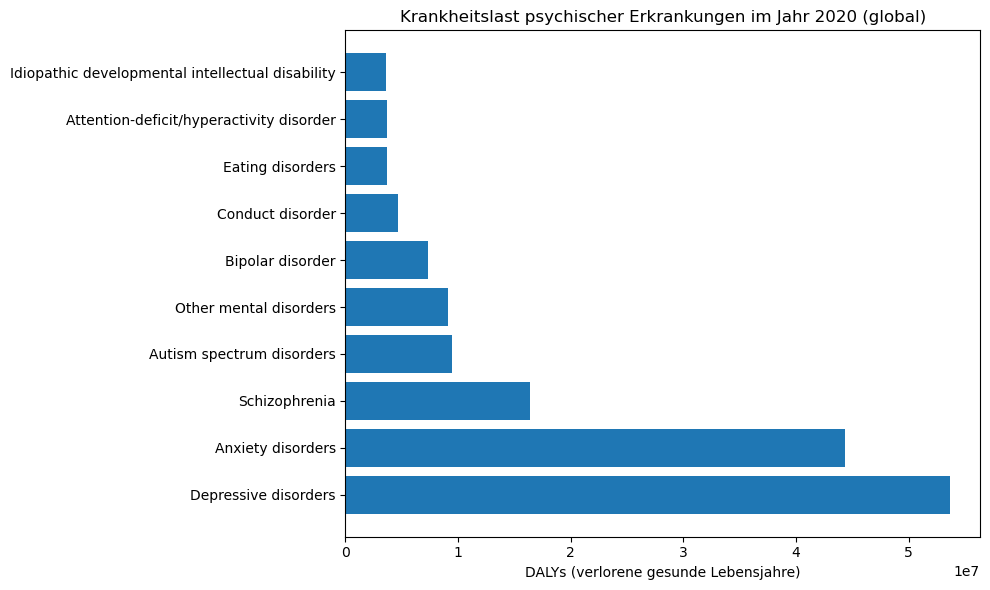

: 

In [ ]:
import matplotlib.pyplot as plt

df_2020 = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["location_name"] == "Global") &
    (df["sex_name"] == "Both") &
    (df["age_name"] == "All ages") &
    (df["metric_name"] == "Number") &
    (df["year"] == 2020)
]

df_2020 = df_2020[df_2020["cause_name"] != "Mental disorders"]
df_2020 = df_2020.sort_values("val", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(df_2020["cause_name"], df_2020["val"])
plt.xlabel("DALYs (verlorene gesunde Lebensjahre)")
plt.title("Krankheitslast psychischer Erkrankungen im Jahr 2020 (global)")
plt.tight_layout()
plt.show()



## 4. Analyse 

### Beobachtungen
- psychische Krankheiten haben zahlenmässig zugenommen
- Die Anzahl an Personen, welche von einer Depression betroffen sind, ist am höchsten. Zudem hat sie am stärksten Zugenommen.
- Ab 2019 wird ein starker Anstieg von Angsstörungen und Depressionen beobachtet.
- Die Anzahl der von Schizophrenie Betroffenen hält sich relativ konstant.


### Interpretation
- Zunahme psychischer Krankheiten: möglicher bias durch Enttabuisierung in den letzten Jahren?
- (Schizophrenie: stark genetisch // Anstieg Deression & Anxiety: wegen Umgebungswandel => Umweltfaktoren beeinflussen stark)

"Interpretation der Resultate (Hypothesen zu den Resultaten)"
"Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen)"


### Berechnungen
"Spezifische Untersuchung der Fragestellung (Berechnungen)"


### Visualisierung
"Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)"

: 

: 